# Homogeense paraboolse võrrandiga Cauchy ülesande lahendamine


<font size="4.0">
On vaja leida funktsioon $u(x,t)$, mis rahuldab $-\infty<x<\infty$ ja $t>0$ korral võrrandit
\begin{equation} 
 \dfrac{\partial u}{\partial t}-D\frac{\partial^{2}u}{\partial x^{2}}=0 \,\, ; \,\,\,\, D=\mathrm{const}>0 \,\,
\end{equation}
ning algtingimust
\begin{equation} 
u(x,0)=\varphi(x) \,\, ; \,\,\,\,  -\infty < x < \infty 
\end{equation}
kus $\varphi(x)$ on etteantud funktsioon.
 Lahendamiseks kasutame Greeni funktsiooni meetodit. Sobilik Greeni funktsioon avaldub
 \begin{equation} 
G(\xi,\tau;x,t)=\dfrac{H(t-\tau)}{[4\pi D (t-\tau)]^{1/2}}\exp\,\left(-\dfrac{(x-\xi)^{2}}{4D(t-\tau)}\right) \,\, .
\end{equation}
Lahendi leidmiseks kasutame $u(x,t)$ avaldist Greeni funktsiooni kaudu ning integreerime numbriliselt.

Päratu integraali
\begin{equation}
\int\limits_{0}^{\infty}f(x)dx
\end{equation}
teisendamiseks lõplike rajadega integraaliks, teeme muutujavahetuse
\begin{equation}
x=\dfrac{\eta}{\alpha-\eta}\,,\;\;\left(\eta=\dfrac{x}{x+\alpha}\right)\,,\;\;\alpha=\mathrm{const}\,.
\end{equation}
Siis $\mathrm{dx}=\mathrm{d}\eta \bigl/(\alpha-\eta)^{2}$ ja
\begin{equation}
\int\limits_{0}^{\infty}f(x)dx=\int\limits_{0}^{1}\dfrac{1}{(\alpha-\eta)^{2}}f\left(\dfrac{\eta}{\alpha-\eta}\right)\mathrm{d}\eta\,.
\end{equation}

<IPython.core.display.Javascript object>


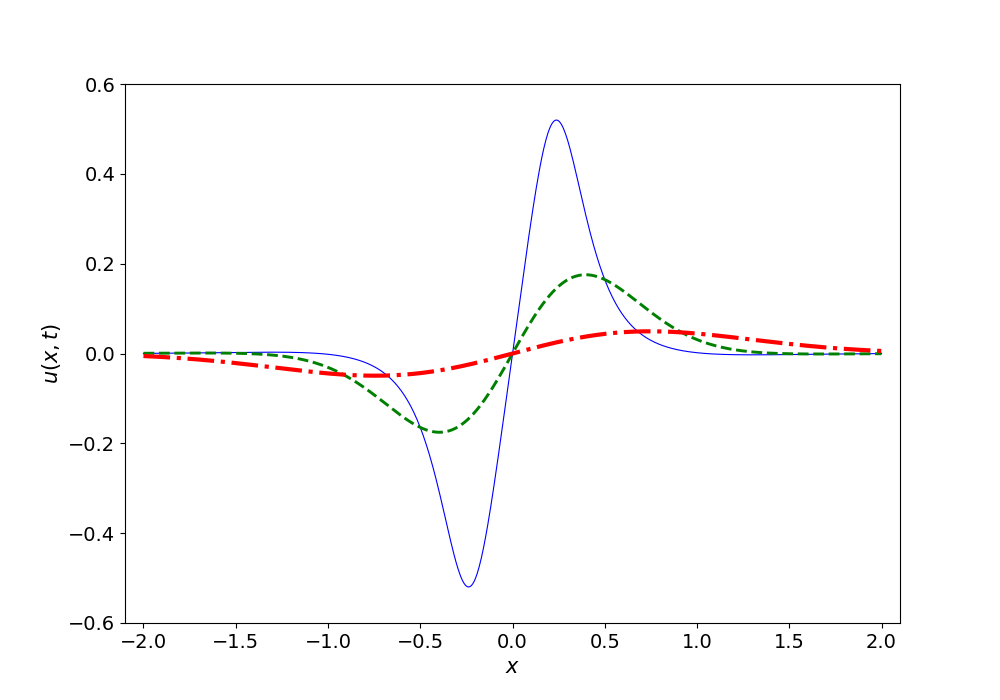

*************************************************
**********PROGRAMM ALUSTAS TÖÖD******************
*************************************************

Arvutan lahendi u(x,t) sõltuvust ruumikoordinaadist x ajahetkel t= 1e-06  ja paigutan tulemuse massiivi:
Data1.
Arvutan lahendi u(x,t) sõltuvust ruumikoordinaadist x ajahetkel t= 0.05  ja paigutan tulemuse massiivi:
Data2.
Arvutan lahendi u(x,t) sõltuvust ruumikoordinaadist x ajahetkel t= 0.25  ja paigutan tulemuse massiivi:
Data3.

Joonistan graafiku.

Programmi käivitamisest kuni programmi töö lõpuni kulus 45 sekundit aega.
***********************************************
**********PROGRAMM LÕPETAS TÖÖ*****************
***********************************************


In [3]:
%matplotlib notebook
import numpy as np
from timeit import default_timer as timer
from matplotlib import pyplot as plt
import math

pii=np.pi
x0=2
D=1
N=700
alpha=1


def too_algus():
    print('*************************************************')
    print('**********PROGRAMM ALUSTAS TÖÖD******************')
    print('*************************************************')
    print('')
    
def too_lopp():
    print('***********************************************')
    print('**********PROGRAMM LÕPETAS TÖÖ*****************')
    print('***********************************************')

def Arvutan(hetk):
    return print('Arvutan lahendi u(x,t) sõltuvust ruumikoordinaadist x ajahetkel t=',hetk,' ja paigutan tulemuse massiivi:')

def rtjuur(argum):
       return argum**(float(1)/2)

A=3
def phi(arg1,param1):
       return np.sin(A*arg1)/(1+((A*arg1)**4))
    
def xip(eta):
    return eta /(alpha-eta)

def fa(eta,param2):
     return 1/((alpha-eta)**2)

def expo1(xi,par1):
     x=par1[0]
     t=par1[1]
     return np.exp((-1*(x+xi)**2)/(4*D*t))

def expo2(xi,par2):
    x=par2[0]
    t=par2[1]
    return np.exp((-1*(x-xi)**2)/(4*D*t))

def U1(eta1,par3):
     return fa(eta1,par3)*phi(-1*xip(eta1),par3)*expo1(xip(eta1),par3)

def U2(eta2,par4):
     return fa(eta2,par4)*phi(xip(eta2),par4)*expo2(xip(eta2),par4)

def integreeri(fm,param,alumine_raja, ulemine_raja, solmede_arv):
    h = (ulemine_raja-alumine_raja)/ solmede_arv
    argument = np.linspace(alumine_raja+ (h/2), ulemine_raja- (h/2), solmede_arv)
    fun= fm(argument,param)
    area = np.sum(fun)* h
    return area

def I1(xf,tf):
     par5=[xf,tf]
     return integreeri(U1,par5,0, 1, 90000)
    
def I2(xff,tff):
     par6=[xff,tff]
     return integreeri(U2,par6,0, 1, 90000)
    
xmin=-x0
xmax=x0
xr = np.linspace(xmin, xmax, N)
phir=np.linspace(0, 1, N)


def u(t,s):
     uusmassiiv='Data'+str(s)+'.'# unikaalne nimi masiivile (unikaalne ainult siis, kui iga kord funktsiooni poole pöörudes on s erinev)
     print(uusmassiiv)
     uusmassiiv= np.linspace(0, 1, N)# defineerime selle nimega massiivi (sisaldab N elementi), kuhu salvestame arvutuse tulemuse
     for i in range(N):
        xi=xr[i]
        ti=t
        koefitsent=1/(2*rtjuur(pii*D*ti))
        uusmassiiv[i]=(I1(xi,ti)+I2(xi,ti))*koefitsent
     return uusmassiiv
#+I2(xi,ti)

plt.figure(figsize=(10,7))    
teljestik = plt.axes(xlim=(xmin-0.1, xmax+0.1), ylim=(-0.6,0.6))

def joon(joonevarv,joonepaksus,joonestiil):
      return  teljestik.plot([], [], color=joonevarv, lw=float(joonepaksus), linestyle=joonestiil)

plt.rcParams.update({'font.size': 13})               
plt.tick_params(labelsize=14)

plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$u(x,t)$", fontsize=15)

algusaeg = timer()
too_algus()

t0=0.000001
Arvutan(t0)
line, = joon('blue',0.8, '-')
line.set_data(xr, u(t0,1))
                 
t1=0.05                 
Arvutan(t1)
line, = joon('green',2.1,'--')
line.set_data(xr, u(t1,2))

t2=0.25
Arvutan(t2)
line, = joon('red',3,'-.')
line.set_data(xr, u(t2,3))

print('')
print('Joonistan graafiku.')
print('')

plt.show()
l6petusaeg = timer()
print('Programmi käivitamisest kuni programmi töö lõpuni kulus',round(l6petusaeg - algusaeg),'sekundit aega.')
too_lopp()

